# ENGSCI 762 Kaggle Assignment: Prediction Sales Prices
## Reed Bell | rbel068 | rbel068@aucklanduni.ac.nz

### I. Frame the problem and look a the big picture

#### Kaggle Overview Summary (from [here][1])
This is a data science project that aims to apply the conventional 'Data Science Process' to a dataset. I this case, the dataset consists of 79 explanatory variables detailing resendential homes. Through the data science process, we hope to implement a machine learning algorithm to this dataset to predict the final price of the home.

**Objective**

Accurately predict the final house price of residential properties located in Ames, Iowa. This includes observing and making use (where applicable) of the 79 explanatory variables that is available to us.

**How will the solution be used?**

The solution model can provide a fast and useful method of predicitng sales price from a variety of explanatory variables. The solution model will be used on a test dataset to determine performance. 



**What the current solutions/workarounds?**

There exist many current methods of prediction house sale price. Traditionally, evaluations are done through real estate agencies. A realtor will use their prior knowledge and experience of the local housing market to determine the sale price. Similar to a machine learning model, a realtor will consider several important variables, but will also [account for less quantifiable factors][3] (such as how the buyers feel/taking advantage of reasons they want to buy a house). Within the Kaggle competition, there are some results already submitted. See the [submitted kernals.][2]

**How should this problem be framed?**

Because labels are supplied to us in testing. We will apply a *supervised learning model*. Alternatively, we can use batch learning to update and improve our prediction the more info we gather (which can extend to future prediction on other datasets). We can also possibly use traditional regression models to find simple relationships between the sale price and some of the explanatory variables.


**How should performance be measured?**

Accuracy comes in the form of Root Mean Square Error (RSME) between the logarithm of the predicted value and the logarithm of the observed sales price:

$$RSME = \sqrt{\frac{\sum_{i=0}^N{(z_{f_{i}} - z_{o_{i}})^2}}{N}}$$


Where:

$z_{f_{i}}$ - Forcasted (predicted) sale price of house $i$ 

$z_{o_{i}}$ - Observed (actual) sale price of house $i$

$N$ - Total number of houses evaluated

**Is the performance measure aligned with the business objective?**

The RSME performance measure allows us to observe how well the model predicts on the entire dataset. This is in line with the objective of accurately prediction sales prices in Ames, Iowa as we can observe (on average) how much the solution model 'misses' the actual sales price. RSME is also an effective performance measure during training (as it is something we want to minimise).


**What would the minimum performance neede to reach the business objective?**

In this event 'accurate prediction' is subject to personal opinion. I consider an accurate solution model to be one that can outperform Kaggle's Sample Submission Benchmark which has an error of 0.40890. 

**What are comparable problem? Can you reuse experience or tools?**

The Boston Housing dataset is also a popular dataset that has been used in the past to predict housing prices. Consisting of 503 observations of 13 feature variables, a similar approach could be used for both datasets. [This blog][4] performs data analysis on the Boston Dataset and recommends some important Python modules to use for data analysis/exploration 
(`seaborn`, `pandas` and `scikit-learn`). The white paper for the dataset is also [available][7] to attain key information about housing in the Ames, Iowa region.

**Is human expertise available?**

For data analytics specific to this problem, many topics and problems are discussed in the [Kaggle Forums][5]. Weekly labs were also run with Dr Andreas Kempa-Liehr discussing the Data Science approace to problems. In regards to professional advice around housing markets, there are several blogs available discussing how realtors go about setting selling prices. These are blogs are especially interesting for highlighting factors that are not easy to quantify such as the buyer/seller mood and urgency:

- [How to determine a listings sales price by Henry Cambell][3]
- [Listing Your House: What List Price Should You Set? by Ilona Bray][6]


**How would the problem be solved manually?**

Realtors (in the US at least) have their own database that they use to check on the local housing market. The Multiple Listing Service (MLS) is kept by all real-estate agencies and tracks homes that have been sold, bought or are listed. Real estate agents can observe the activity happening within the neighborhood/suburb/city to get an idea of macro-economic trends. It is also the job of the realtor to consider the house itself and valuate amenities, architecture or build quality. 

**List of assumptions**

- We are assuming that the dataset is representative of properties located in Ames, Iowa.
- The entrance of N/A for catagorical variables can be treated as the lack of subject described by attribute.


**Verifying assumptions** 

With regard to representation, the dataset tracks all residential house sales in the Ames, Iowa region from 2006 to 2010. The use of residential property is important due to how general the residential properties can be. While this dataset does exclude more modern buildings (built 2010 onwards), it will still capture regional trends as well as trends inherent to houses (like no of rooms, bathrooms, size etc). 

While remove observations with 'NA' values is a standard statistical approach (especially for machine learning models which don't handle missing data well), there are some excpetions to this. For example, the use of the 'NA' for several catagorical variables describes the lack of the feature, rather than it not being recorded. Thus, for variables describing the existance of pools, fence, garages etc, will not be omitted as they can be significant to the sale price. This is covered further in part 3.


### II. Get the Data


**Find and document where you can get the data.**

The Ames, Iowa housing dataset is available in the Data section of the 'House Prices: Advanced Regression Techniques' Kaggle competition [here][8]. This will require some level of authorisation (see 'Get access authorisations' below).


**Get access authorisations**

For this specific copy of the Ames, Iowa dataset, you will need to create a Kaggle account and join the test competition [here][9]. See below for my authorisation. 

![My Kaggle Account](./images/verify.png)


**Get the data**

I have downloaded my own copy of the data and placed it into the `data` folder of this repository. 



[1]: https://www.kaggle.com/c/house-prices-advanced-regression-techniques
[2]: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels
[3]: https://www.agentharvest.com/blog/how-realtors-determine-a-listings-sales-price/
[4]: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
[5]: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion?sortBy=top&group=all&page=1&pageSize=20&category=all
[6]: https://www.nolo.com/legal-encyclopedia/listing-house-what-price-should-set-32336.html
[7]: http://jse.amstat.org/v19n3/decock.pdf
[8]: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
[9]: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

### III. Explore the data

In [1]:
# All the important imports
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 1)
%matplotlib inline 

pd.options.display.max_rows = 100
pd.options.display.max_columns = 80

In [2]:
# Look at shape and check for duplication
train = pd.read_csv("data/train.csv")
print("Training Data: " + str(train.shape))

train_dup = train.shape[0] - len(set(train.Id))
print("Number of duplicates in Train: {}".format(train_dup))
train

quant = [f for f in train.columns if train.dtypes[f] != 'object']
quant.remove('SalePrice')
quant.remove('Id')
qual = [f for f in train.columns if train.dtypes[f] == 'object']



Training Data: (1460, 81)
Number of duplicates in Train: 0


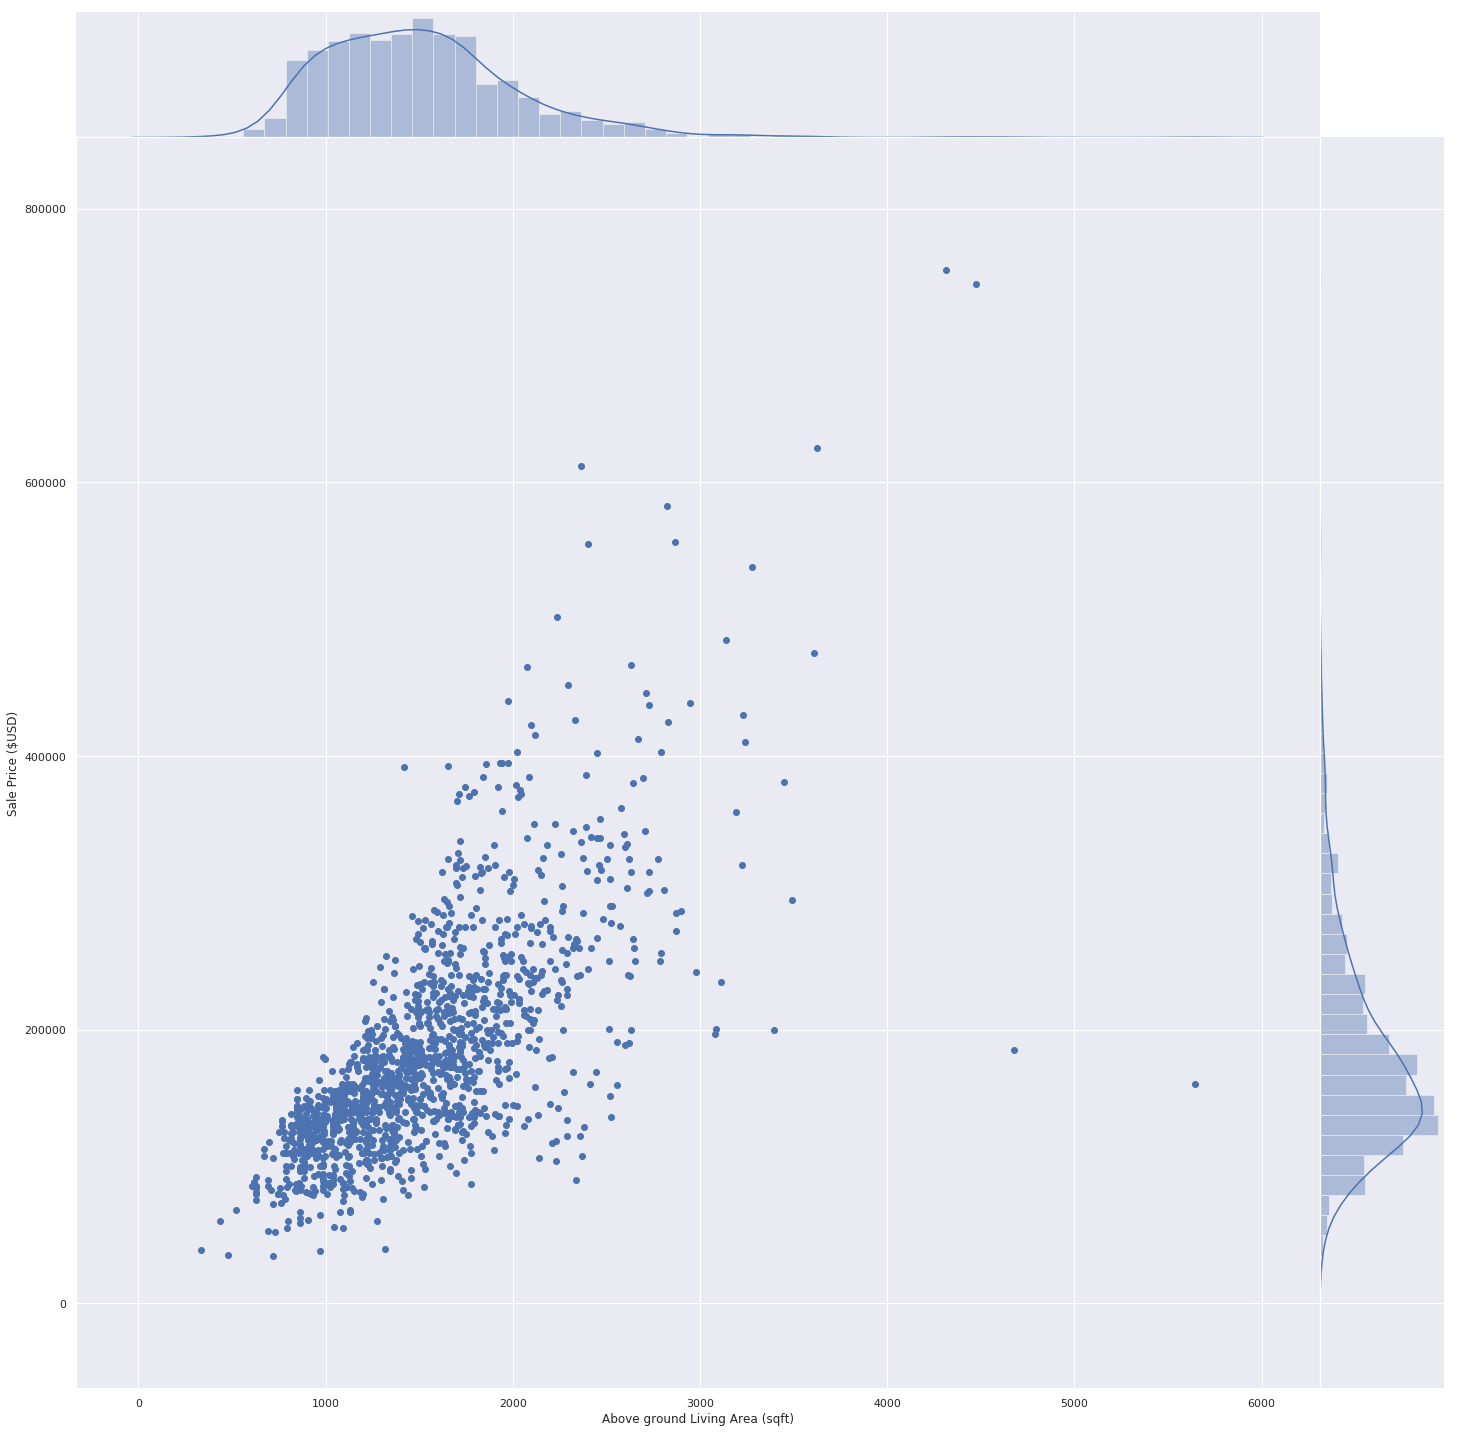

In [3]:
# So no duplicates. Now, we look for the some outliers.
train_area = train.GrLivArea
train_saleprice = train.SalePrice

scat_grid = sns.JointGrid(x="GrLivArea",
                          y="SalePrice",
                          data=train,
                          space=0,
                          height=20,
                          ratio=10)

scat_grid.plot_joint(plt.scatter,
                     color="b")

scat_grid.plot_marginals(sns.distplot,
                         kde=True,
                         color="b")

scat_grid.set_axis_labels("Above ground Living Area (sqft)", "Sale Price ($USD)")


**Scatter Plot**
This figure displays the correlation between the above ground living area of the house and the final sale price. As we can see, the relationship is strongly positive. 

However, most interestingly, we observe some outliers in the data. In particular, the existance of very large home with very cheep costs. This may be evidence for removal to improve regression later on. The author of the dataset mentions that removal of observations with an area $>4000ft^2$ is recommended for this reason.

**Sale Price distribution**
In SalesPrice we observe Normal features in the distribution with some positive skewing.

**Above Ground Area distribution**
For area, we observe a much more centralized distribution which large dropoffs which is likely due to standadized living and home design. 

Text(0.5, 1.0, 'Quatitative Variables Heat Map')

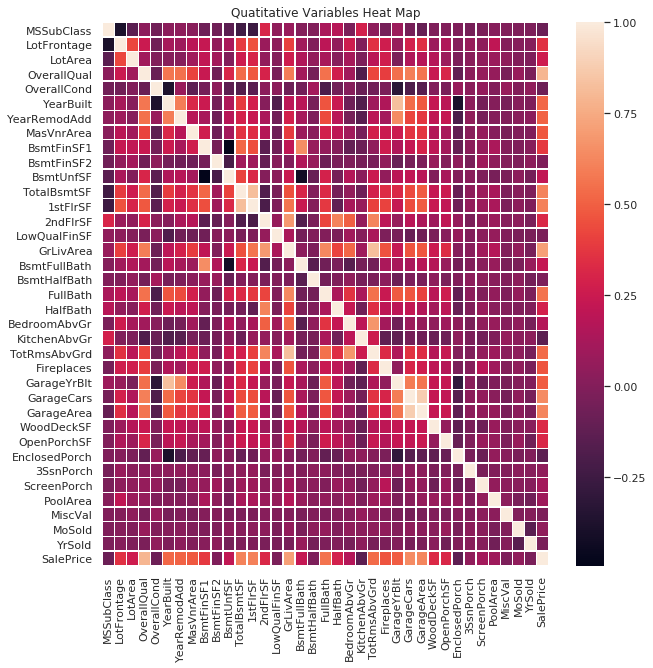

In [11]:

corr = train[quant+['SalePrice']].corr()


fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corr, linewidths=.5, ax=ax)
ax.set_title("Quatitative Variables Heat Map")

**Quantitative Heatmap**

This heatmap compares the correlation between all quantitative variables in the dataset. In particular, we notice some ineteresting 1-to-1 correlations with SalePrice and other variables. As one might expect, we observe sale price has a strong positive correlation with overall house quality (in OverallQual) but we also observe increases in the sale price dependant on features that people want in a house such as garage area (GarageArea), deck area (WoodDeckSF). We also notice a stronger correlation for first floor total area (1stFlrSF) and second floor total area (2ndFlrSF) which further suggests the positive correlation for open, flat homes (in contrast to multiple stories). 

[Text(0, 0.5, 'Sale Price ($USD)'), Text(0.5, 0, 'Neighborhood')]

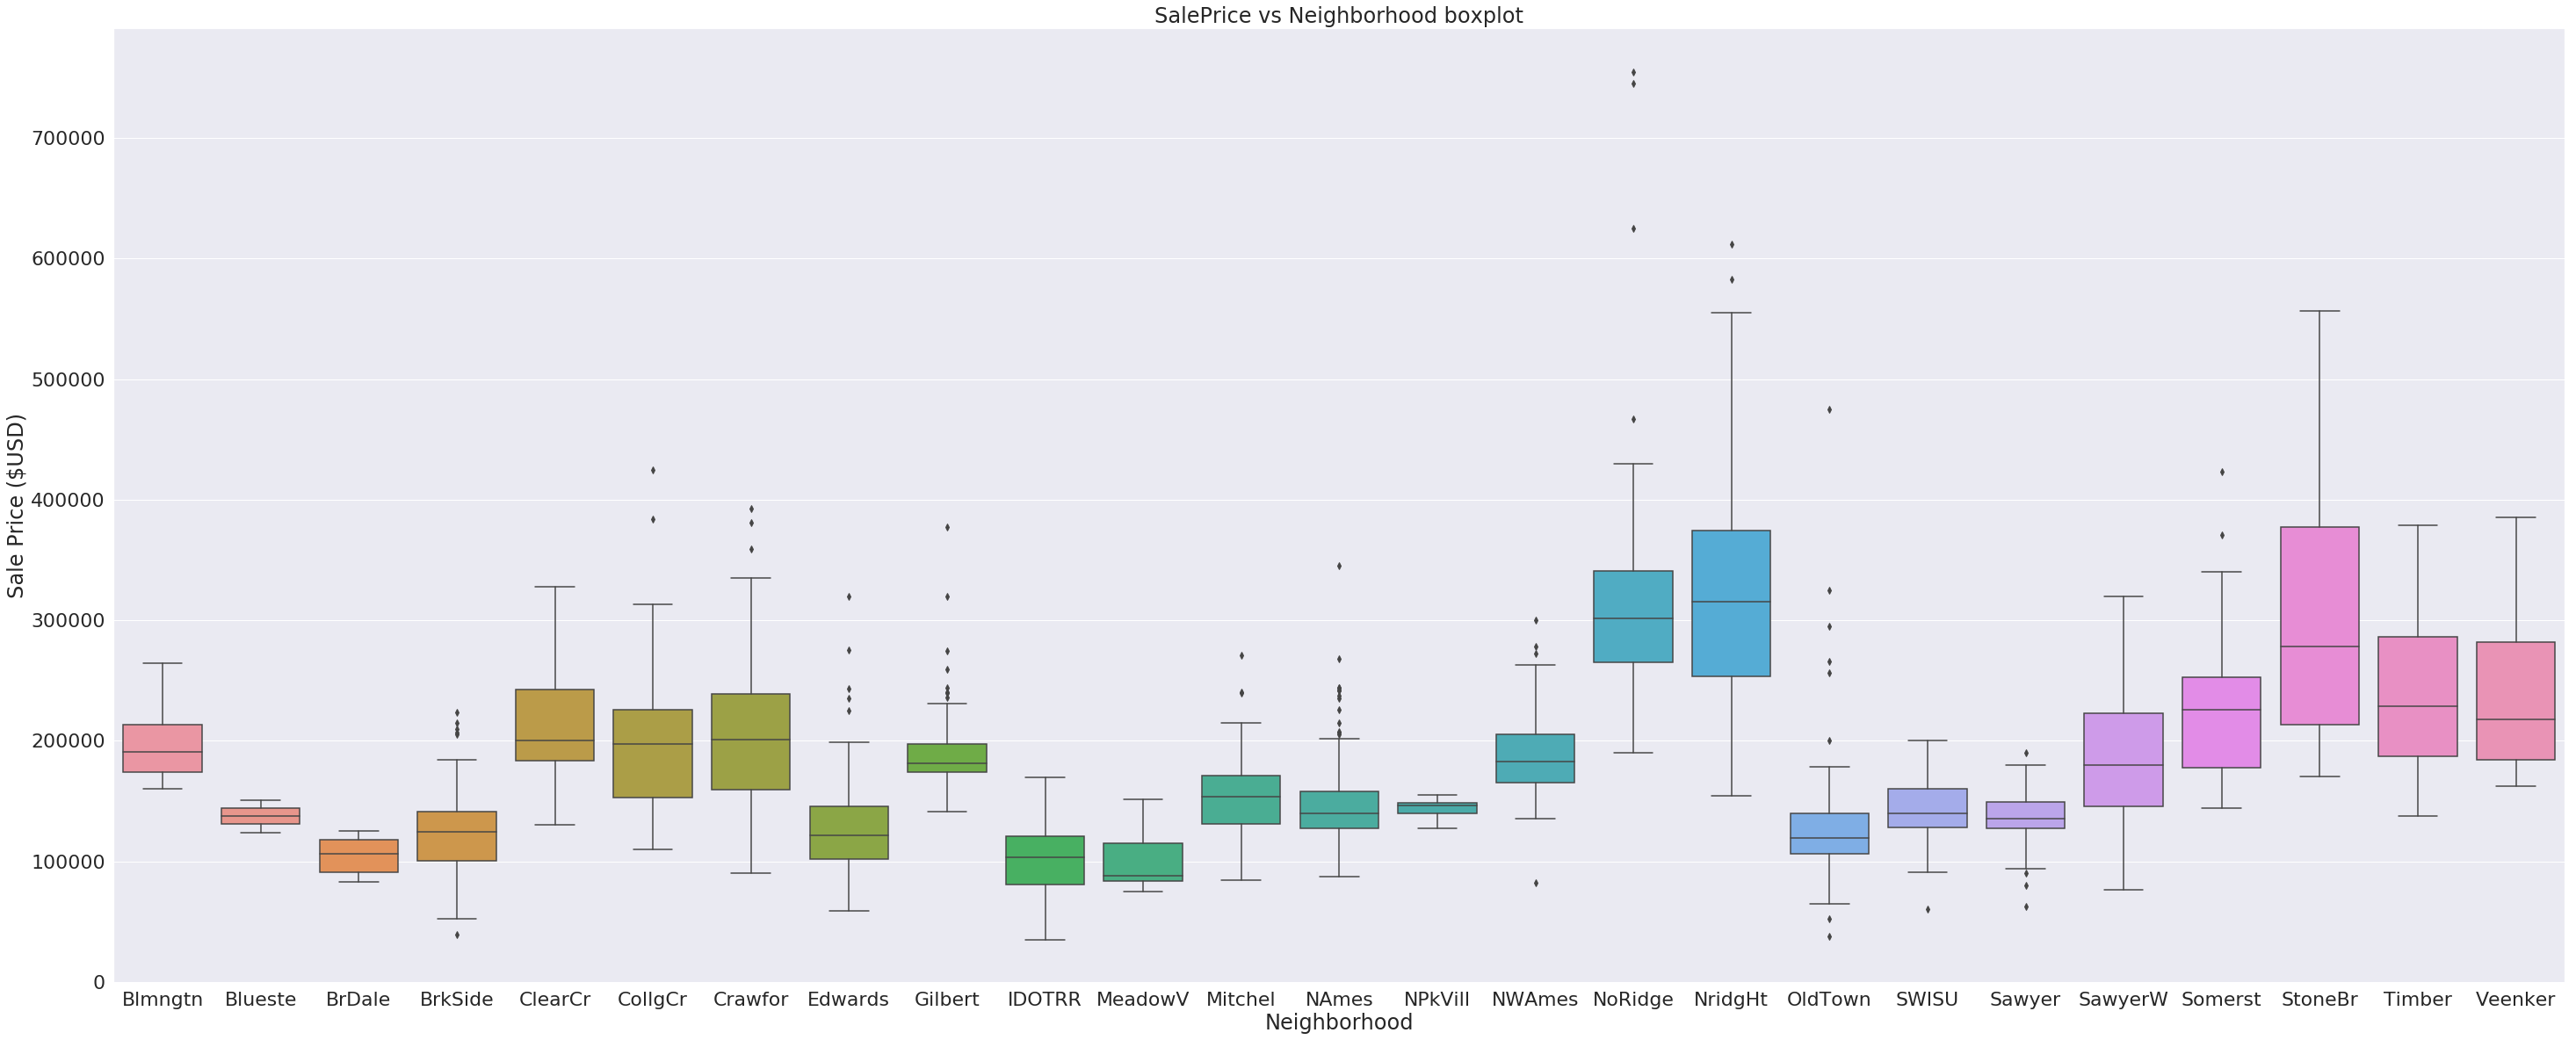

In [29]:
for c in qual:
    train[c] = train[c].astype('category')
    if train[c].isnull().any():
        train[c] = train[c].cat.add_categories(['MISSING'])
        train[c] = train[c].fillna('MISSING')

sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(50,20))
box = sns.boxplot(x="Neighborhood",
                  y="SalePrice",
                  data=train,
                  ax=ax)

box.set_title("SalePrice vs Neighborhood boxplot")
box.set(ylabel="Sale Price ($USD)", xlabel="Neighborhood")

**Sale Price vs Neighboorhood Boxplots**

Here we observe the influence of the house location to sale price. While some neighborhoods capture a wide range of house listings (NoRidge, NridgHt, StoneBr), they tend to be in the higher price ranges which indicates increased variability in house price in perceived richer neighborhoods. This makes sense as more expensive homes become less homogenous (as seen in the scatter plot) and subject to more variation in design. Neighborhoods with lower median house price however display very little variation in house price (small range) which confirms correlation between the choice of neighborhood and the house price. 

[Text(0, 0.5, 'Sale Price ($USD)'),
 Text(0.5, 0, 'Heating Quality [Ex=Excellent, Fa=Fair, Gd=Good, Po=Poor, TA=Average]')]

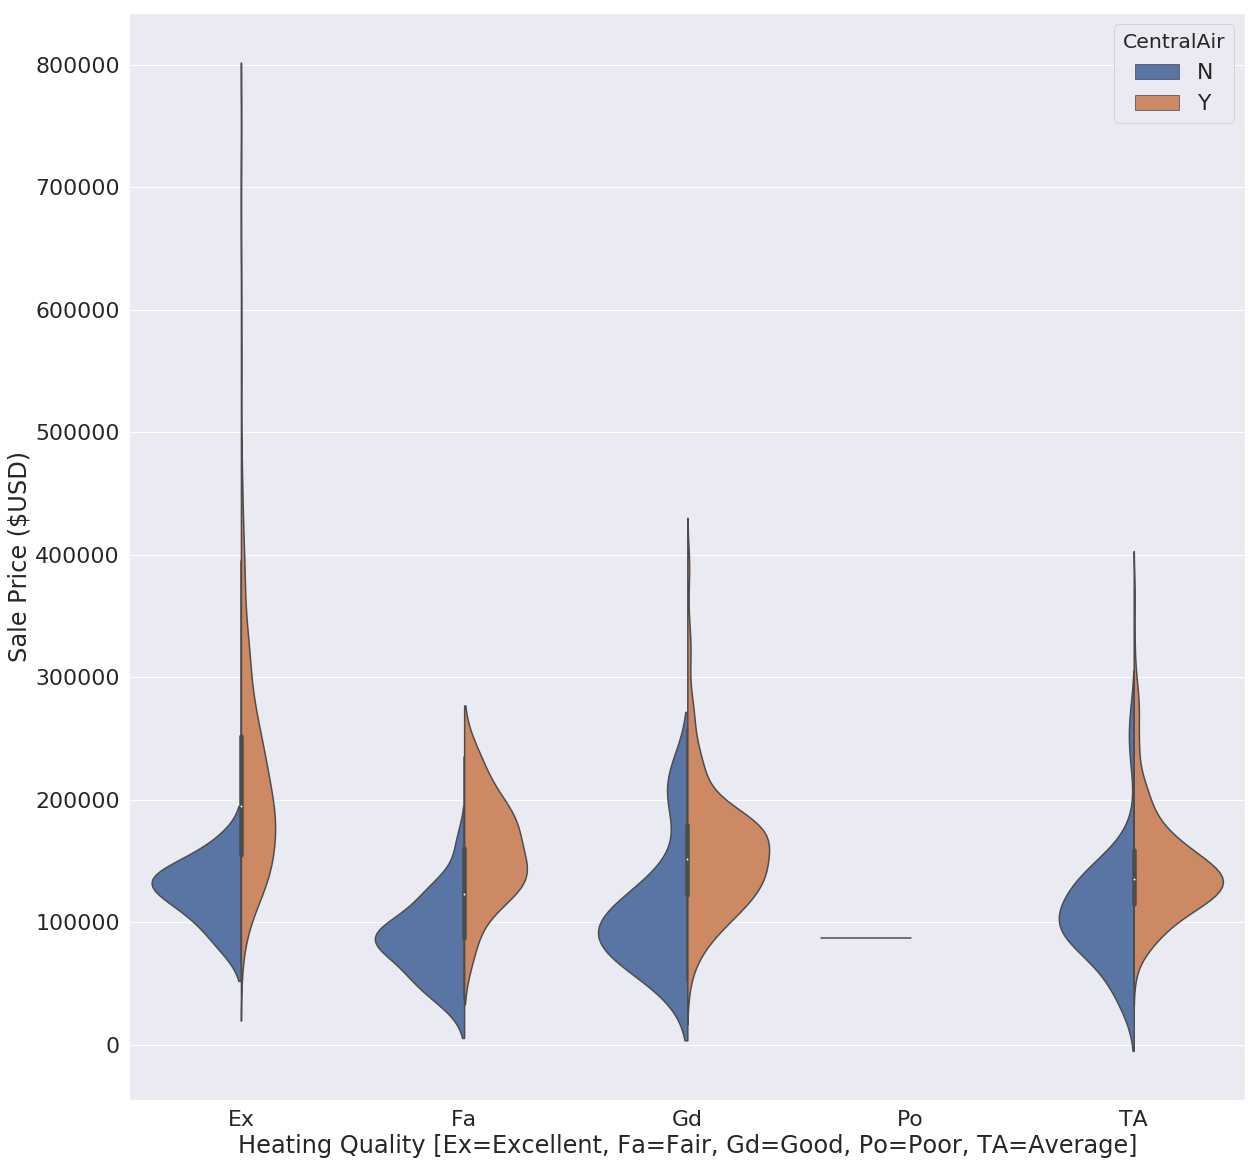

In [40]:
fig, ax = plt.subplots(figsize=(20,20))
sns.violinplot(x="HeatingQC", y="SalePrice", hue="CentralAir", data=train, split = True, ax=ax)
ax.set(xlabel="Heating Quality [Ex=Excellent, Fa=Fair, Gd=Good, Po=Poor, TA=Average]", ylabel="Sale Price ($USD)")

**Violin plot SalePrice, Heating quality and existance of Central Air conditioning**

Here we observe (with the exception of poor heating quality) an indifference in sale price given the heating quality. However, we notice a distinct increase across the board for central heating. Ames, Iowa is considered to have a ['humid continental climate'][1] which likely explains the preference for central air conditioning. The similar heating quality could be explained by the fact that every house seems to have it (due to the cold winter climate), and the any quality appears to be adequate for the climate (thus it isn't a valuable feature in regards to sale price).


[1]: https://www.wikiwand.com/en/Ames,_Iowa

[Text(0, 0.5, 'Sale Price (USD)'), Text(0.5, 0, 'Year Built')]

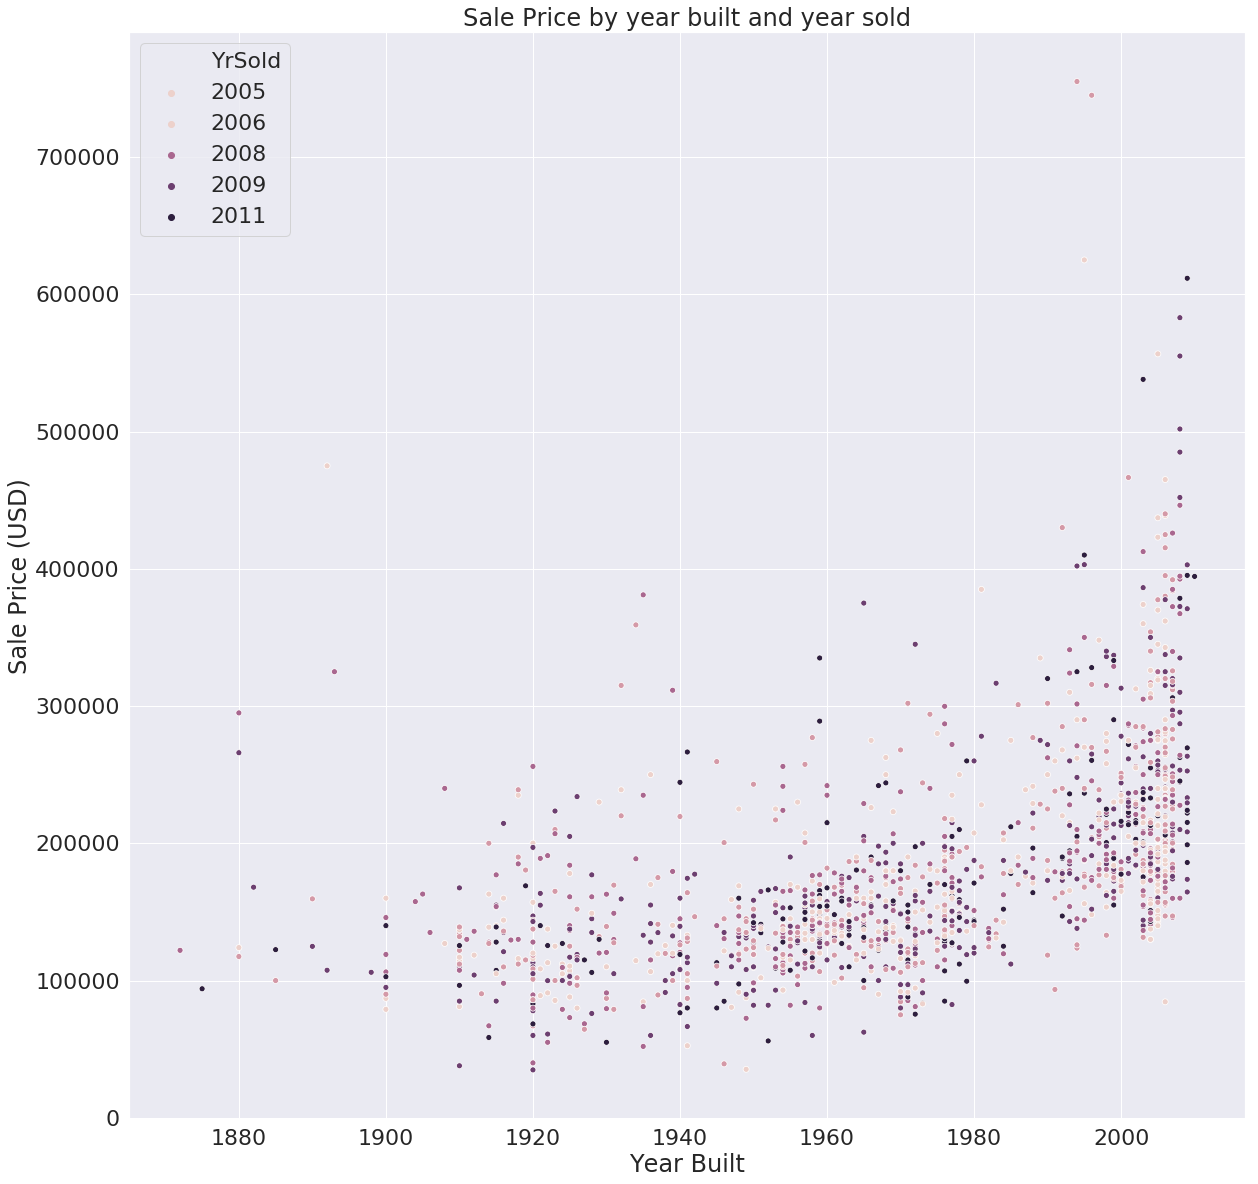

In [49]:
fig, ax = plt.subplots(figsize=(20,20))
sns.scatterplot(x="YearBuilt", y="SalePrice", hue="YrSold", data=train).set_title("Sale Price by year built and year sold")
ax.set(xlabel="Year Built", ylabel="Sale Price (USD)")


**Scatter Plot**

Here I wanted to see how year build and year sold correlated with sale price. While the year built has a positive correlation, the year sold appears to have little to effect on sale price. This might be die to the relatively few years of selling data (2005-2011). 